<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/3_Neural_Network_Regressions_with_Tensorflow/Neural_Network_Regressino_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression inputs and outputs

Inputs -> Machine learning algorithm -> Outputs

## What is Regression problem ?

If you are planning to predict a house price with available variables like number of rooms , bathrooms, squarefoot etc, then you are dealing with a regression problem.

## How are you going to solve it ?

Understand inputs (independent variable) and outputs (dependent variables).

Inputs features can be number of rooms, bathrooms etc. Try creating a data using one-hot encoding (which is learnt earlier).  Looks if someone has already created a machine learning algorithm (for example supervised learning algorithm) for your problem online. If you cant find you can implement by yourself. Finally output can be a price predicted of the house from the inputs you shared through iput.

Here numerical encoding of indepedent variables in the form of tensor.

# Anatomy of Neural Networks (NN)

Input layers -> Hidde layers -> Output layers

With hidden layers, the neural network learns the pattern.

## What does the NN regression algorithm look like ?

Hyper Parameters we need to consdier are


1. Input layer shape
2. Hidden layer(s)
3. Neurons per hidden layer
4. Output layer shape
5. Hidden activation
6. Output activation
7. Loss function
8. Optimizer


## Here in this Housing problem
1. Input layers are number of bathrooms, rooms etc.
2. Hidden layers: Problem specific 1 to unlimited
3. Neurons per hidden layer: generally 0 to 100
4. Output layer shape : same shape as desired prediction shape (eg. 1 for house price)
5. Hidden activation : Usually ReLU (Rectified Linear unit).
6. Output activation : None, ReLu , logistic/tanh
7. Loss function: MSE (Mean square error) or MAE  (Mean absolute error) / Huber (Combination of MAE/MSE) if outliers
8. Optimizer : SGD stochastic gradient descent , Adam






# Introduction to Regressions with NN in tensor flow.

There are many definitions for a regression problem but in our case, we are going to simplify it. Predictig numerical variabel absed on some other combination of variabels even sorter predicting a number.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


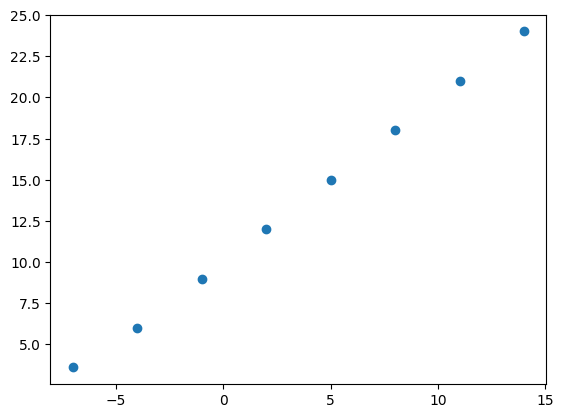

In [2]:
#Creating data to view and fit

import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.6, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


#Visualize it
plt.scatter(X, y)

Lets try to work pattern between X and y

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([False,  True,  True,  True,  True,  True,  True,  True])

Input and Output shapes

In [5]:
#Create Demo tensor for our housing price predictio problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
print(house_info)

house_price = tf.constant([939700])
print(house_price)

house_info.shape, house_price.shape

tf.Tensor([b'bedroom' b'bathroom' b'garage'], shape=(3,), dtype=string)
tf.Tensor([939700], shape=(1,), dtype=int32)


(TensorShape([3]), TensorShape([1]))

In [6]:
X[0], y[0]

(-7.0, 3.6)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.6)

##Turnig  Numpy Arrays into tensors

In [11]:

X = tf.cast(tf.constant(X),  dtype=tf.float32)
y = tf.cast(tf.constant(y),  dtype=tf.float32)
X = tf.reshape(X, shape=(8,1))
y = tf.reshape(y, shape=(8,1))
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.6],
        [ 6. ],
        [ 9. ],
        [12. ],
        [15. ],
        [18. ],
        [21. ],
        [24. ]], dtype=float32)>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

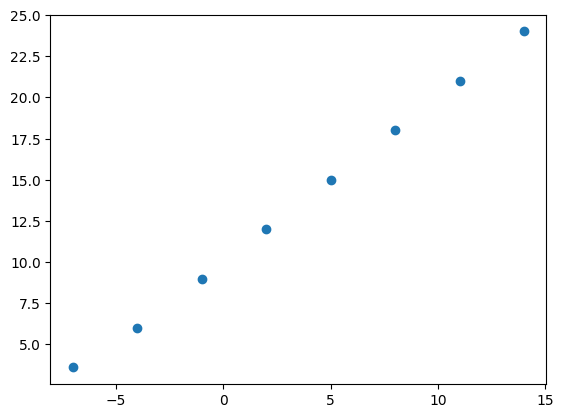

In [13]:
plt.scatter(X, y)

##Steps in modelling with Tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our models how to improve the patterns its learning) and evalutation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find the patterns between x and y (Features and labels)

In [14]:
#Set random seed
tf.random.set_seed(42)

print(X)
#1. Create a model using the Sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mean absolute error : Comparision of prediction vs observed
              optimizer = tf.keras.optimizers.SGD(), #Stochastic radiant descent
              metrics = ["mae"])

#3.Fit the model
model.fit(X, y, epochs=5)


tf.Tensor(
[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]], shape=(8, 1), dtype=float32)
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.4363 - mae: 11.4363
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 11.3038 - mae: 11.3038
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 11.1713 - mae: 11.1713
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 11.0388 - mae: 11.0388
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.9063 - mae: 10.9063


In [15]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.6],
        [ 6. ],
        [ 9. ],
        [12. ],
        [15. ],
        [18. ],
        [21. ],
        [24. ]], dtype=float32)>)

In [16]:
#Try predicting the model
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[13.413055],
       [ 0.05    ]], dtype=float32)

In [17]:
#added prediction + mae
y_predict = y_predict + 10.7413
y_predict

array([[24.154354],
       [10.7913  ]], dtype=float32)

## Improve our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization fucntion.
3. **Fitting a model** -Here we might fit model for more **epochs** (leave it training for long time)
  

In [18]:
#Lets rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.2515 - mae: 13.2515
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 12.2966 - mae: 12.2966
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.3489 - mae: 11.3489
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 10.4129 - mae: 10.4129
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 9.4680 - mae: 9.4680
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.5235 - mae: 8.5235
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.6959 - mae: 7.6959
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.8881 - mae: 6.8881
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.0543 - mae: 6.0543
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 5.1959 - mae: 5.1959
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.3142 - mae: 4.3142
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.7821 - mae: 3.7821
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54

In [19]:
#Lets predict now
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[28.709263],
       [10.326911]], dtype=float32)

We were expecting value of y predicted is 27. Its almost near with an mae 0.2162 and loss : 0.2163. Lets try increasing layer and check

In [20]:
#Can we do better lets see
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.4090 - mae: 13.4090
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.1491 - mae: 13.1491
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.8762 - mae: 12.8762
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.5958 - mae: 12.5958
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.3101 - mae: 12.3101
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.0196 - mae: 12.0196
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.7166 - mae: 11.7166
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.4032 - mae: 11.4032
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.0716 - mae: 11.0716
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 10.7200 - mae: 10.7200
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 10.3735 - mae: 10.3735
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.0931 - mae: 10.0931
Epoch 13/100
1/1 ━━━━━━━━━

In [21]:
#Lets predict again
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[31.217258 ],
       [ 3.8845625]], dtype=float32)

Looks our model is overfitting it means it has learnt the data very well that is leading to a problem. It should be well balanced. Here the key hyper parameter we tweaked is learning rate apart from adding a new layer. Lets revert it back to 0.01 instead of 0.001 and see if the model predicts y value perfectly.

In [22]:
#Lets try with Adam learning rate 0.01 instead of 0.001

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3.Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14.0781 - mae: 14.0781
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 11.5897 - mae: 11.5897
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 10.0925 - mae: 10.0925
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 8.5324 - mae: 8.5324
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 6.6843 - mae: 6.6843
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 4.4720 - mae: 4.4720
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 4.0367 - mae: 4.0367
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 5.3142 - mae: 5.3142
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 5.9831 - mae: 5.9831
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 6.2772 - mae: 6.2772
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 5.7043 - mae: 5.7043
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 5.0835 - mae: 5.0835
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [23]:
#Lets predict now
new_input = tf.constant([17.0,0])
y_predict = model.predict(new_input)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[28.98686],
       [10.47808]], dtype=float32)

Tried with 3 dense layers still the model was overfitting slightly so reduced one layer and learning rate 0.01, it predicts fine.

##Evaluating the model
Typical flow is like
1. Create Model
2. Compile Model
3. Fit Model
4. Predict
5. Tweak the Model by changing hyper parameters.
6. Repeat 1 to 4

When Evaluating the models we always need to **visualize**.

*Visualize the data : What data are we working with. What does it look like.
*Visualize the model :What does our model look like ?
*Visualize the training model : How does the model perform while it learns
*Visualize predictions of the model: How do the predictions of a model line up against the ground truth (the original labels).



In [24]:
#Make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
#Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

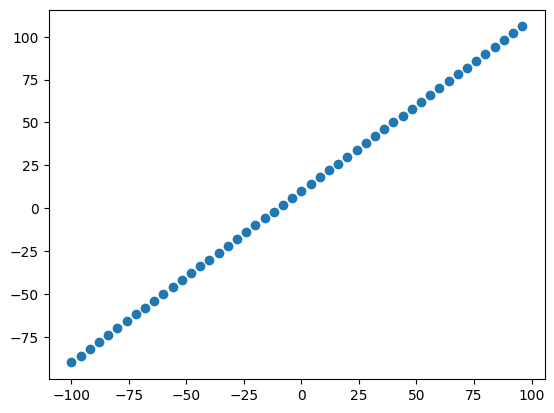

In [26]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

###The concepts of 3 sets
***Set-1: Training Set*** : Model learns from this data (70 to 80% of the total we have available). Analogy is your course material.

***Set-2 : Validation set*** : Models gets tuned on this data, which is typically 10 to 15% of data available. Analogy is practice exam

***Set-3 : Test set*** : The model gets evaluated on this data to test what has learned, this set is typically 10-15% of the total data vailable. Analogy is Final exam.

In [27]:
#Check the lenght of how many samples we have
len(X)

50

In [28]:
#Split the data into train and test sets
X_train = X[:40] #First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]  #Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

###Visualizing the data
Now we have got our data in training and test sets. Lets visualize again

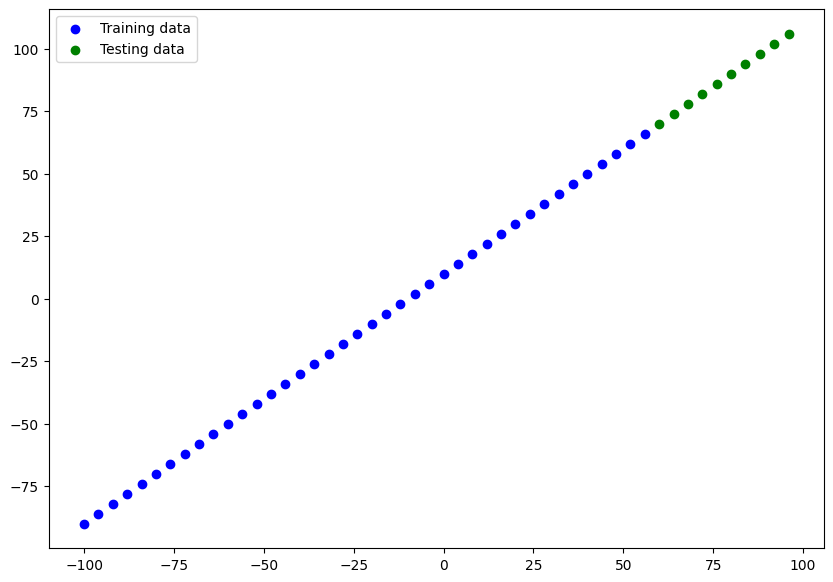

In [29]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

#Show the legend
plt.legend()

###Lets look at how to build NN for our existing data. We did this earlier. But we will recreate again.

In [43]:
#Reshape X_train and X_test to have an added dimension for batch size
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
#model.fit(X_train, y_train, epochs=100)
model.build(input_shape=[None, 1])


#Visualizing the model

In [44]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Shape of data that we are passing the model


In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [45]:
X.shape, y.shape

(TensorShape([50]), TensorShape([50]))

In [118]:
#Lets create a model which builds automatically by defining the input shape argument
tf.random.set_seed(42)

#create the model
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]), #Dense means fully connected layer. All neurons connected to all neurons in next layer
    tf.keras.layers.Dense(1) #output later with 1 unit to match the shape of y_train
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 101.8378 - mae: 101.8378 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 29.8579 - mae: 29.8579
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.7366 - mae: 10.7366
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.2179 - mae: 15.2179
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.2511 - mae: 14.2511
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.4968 - mae: 13.4968
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.8417 - mae: 16.8417
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.6135 - mae: 9.6135
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.6801 - mae: 10.6801
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.7708 - mae: 11.7708
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.9011 - mae: 12.9011
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15.0948 - mae: 15.0948
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

* **Total Params** - total number of
parameters in the model.
* **Trainable parameters** - These are the parameters (patterns) the model can update as it trains.
* **Non-trainable params**:  These parameters are not updated during training. This is typical when you bring in already learning parameters or patterns from other models during **transfer learning**

🔖 Resources:For more in-depth overview of trainable parameters within layer, checkout MIT's introduction to deep learning video. URL : https://introtodeeplearning.com/

In [119]:
#Get summary of our model
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

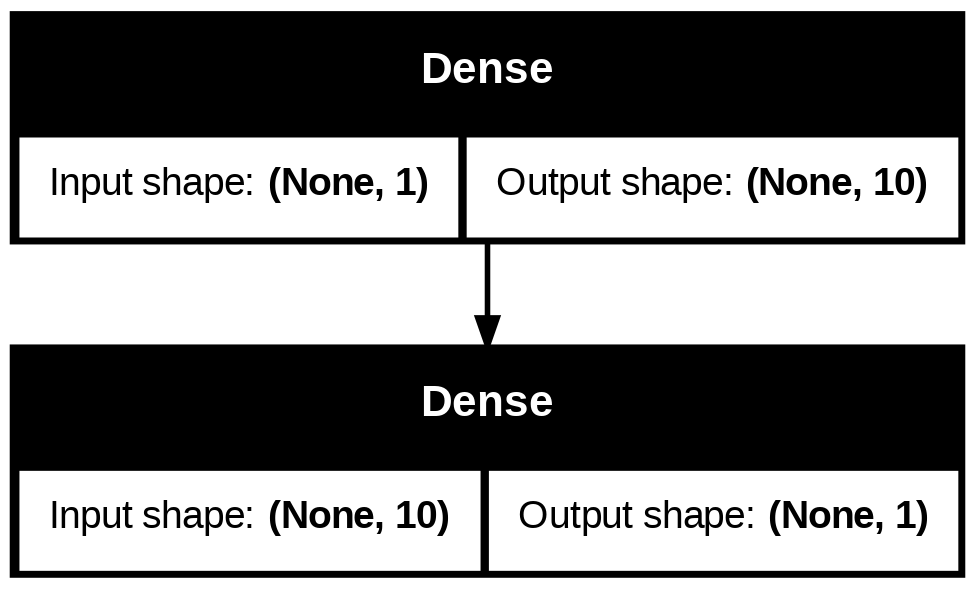

In [120]:
#Lets visualize our model
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [129]:
#Lets repeat above and understand if we can do with single layer
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # Changed 'optimizers' to 'optimizer'
              metrics = ["mae"])

#3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 35.4225 - mae: 35.4225 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 27.3083 - mae: 27.3083
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 24.2374 - mae: 24.2374
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 20.1518 - mae: 20.1518
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 18.0978 - mae: 18.0978
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 17.2305 - mae: 17.2305 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8668 - mae: 11.8668
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.7324 - mae: 14.7324
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15.5412 - mae: 15.5412
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.6208 - mae: 11.6208
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.5859 - mae: 14.5859
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.6294 - mae: 15.6294
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━

In [130]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

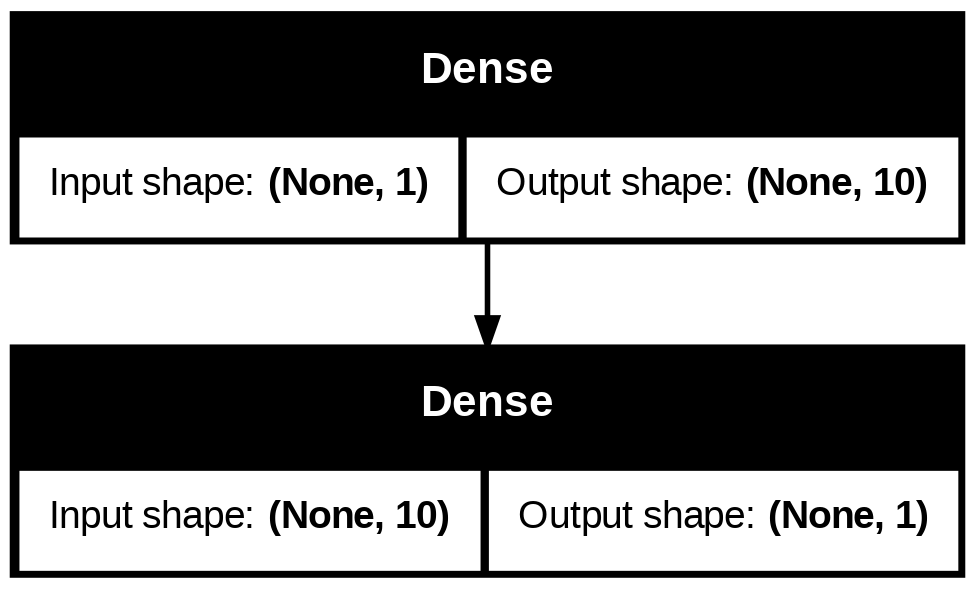

In [131]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

###Visualizing model predictions

To visualize predictions its good idea to plot them against the ground truth labels.

Often you will see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model

In [132]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[37.15734 ],
       [39.528286],
       [41.899227],
       [44.27017 ],
       [46.641113],
       [49.012054],
       [51.382996],
       [53.753937],
       [56.12488 ],
       [58.495823]], dtype=float32)

In [108]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [133]:
#Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #show the legend
  plt.legend()

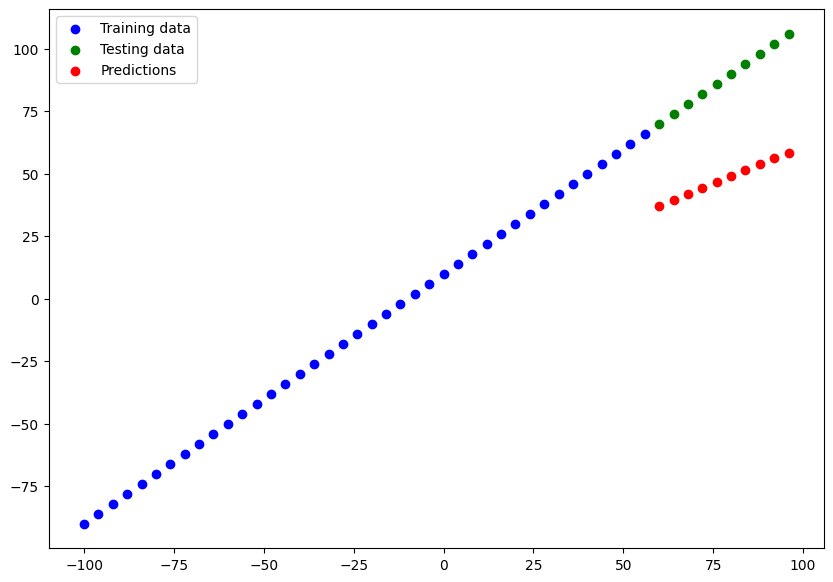

In [134]:
#Plot predictions
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)